# Modelos de entranamiento

En este cuaderno se expondrá algunos modelos, como se realiza su entrenamiento y nociones basicas de machine learning, esto con el fin de saber seleccionar un modelo adecuado para cada situación, además de que conocer sobre dichos modelos ayuda a solucionar problemas que puedan presentarse durante el entrenamiento.

Muchos de estos modelos se encuentran implementados en **scklearn**, por lo que cuando se busque realiar un modelo no es necesario implementar desde cero los modelos


# Regresión lineal

Este modelo del machine learning realiza prediciones simplemente mediante el producto punto del vector de los pesos($\overrightarrow{\theta}$) por los atributos($\overrightarrow{x}$) así como se muestra en la siguiente ecuación

$$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_{n-1} x_{n-1} + \theta_n x_n $$

- $\hat{y}$ es la predicción.
- $n$ es el numero de atributos.
- $x_i$ es el i-enesimo atributo.
- $\theta_i$ es el i-enesimo peso donde $\theta_0$ es el termino constante, y los demas son los pesos de cada atributo, es decir, que tanto aporta a nuestra predicción dicho atributo.

Todos los modelos de machine learning utilizan funciones conocidas como **funciones de costo** que indican que tan bien o mal está realizando su trabajo el modelo, que dependiendo del tipo de modelo existen varias funciones de costo que pueden utilizarse para este fin, especificamente en regresión lineal se utiliza el **MAE**, el **RMSE** y el **MSE**, aunque debido a que ambas llevan al mismo resultado se prefiere el MSE, ya que resulta más fácil de *minimizar*.

$$MSE(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})^{2}$$

el vector $x^{(i)}$ se ve de la siguiente manera, sin embargo hay que considerar que no necesariamente debe tener 4 entradas

$$ x^{(i)} = \; 
\begin{bmatrix}
      -118.23 \\
      33.91 \\
      1.31 \\
      38.37
\end{bmatrix} 
$$

**Nota:** Con minimizar se refiere a obtener el menor valor posible de dicha función, o desde la vista del calculo encontrar el minimo de la función.

# Ecuación normal

Algunos algoritmos de machine learning cuentan con ecuaciones las cuales permiten encontrar el valor de $\theta$ que minimiza la funcion de costo y da el resultado de manera directa, en el caso de regresión lineal esta ecuación se conoce como **ecuación normal**

$$\hat{\theta} = (X^{T} X) X^{T} y $$

A continuación se muestra su implementación en python, en este caso se crearon datos lineales aleatorios, sin embargo en los problemas de la vida real no todos los sistemas podrán ser estudiados mediante modelos lineales, si se tienen dudas sobre que la relación de los datos sean lineales, se puede utilizr el coeficiente de correlación de **Bravais-Person**, o en caso de no ser lineal, pero se desea saber si ambas variables tienen alguna relación el coeficiente de **Spearman**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.rand(100,1)

Primero se crearon algunos dato lineales con algo de ruido, y en la siguiente celda se realizo un grafico de dichos datos

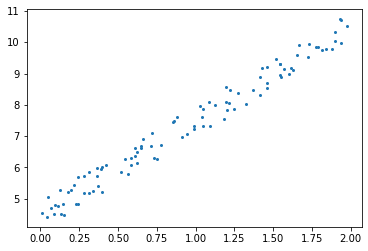

In [2]:
plt.scatter(X,y,s=4)
plt.show()

Antes de utilzar la ecuación se necesita agregar una columna de unos del mismo largo de instacncias en X, esto se realizar en la primera línea de codigo del siguiente bloque, esto es así ya que esta ecuación proviene del problema de minimos cuadrados, donde se tienen ecuaciones del siguiente estilo

$$  y = \theta_0 + \theta_1 x_1  $$

Utilizando los valores de $y$ y $x$, provenientes del vector de soluciones y de atributos respectivamente. Por ejemplo digamos que tenemos un atributo y 3 instancias, siendo las instancias de la forma  $(x,y)$ estas son $(1,5)$, $(2,3)$,$(3,7)$, entonces se obtienen las siguientes 3 ecuaciones  

$$ \theta_0 + \theta_1 = 5   $$
$$ \theta_0 + 2\theta_1 = 3   $$
$$ \theta_0 + 3\theta_1 = 7  $$

Si observamos detenidamente los valores que multiplican a $\theta_0$ son 1 para todos los casos, por lo que como se menciono se debe agregar como se hace en la primer linea, para que pueda funcionar correctamente el algoritmo

In [3]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#### Valores que minimizan la función de costo

Los valores del $\vec{\theta}$ se encuentran ordenados de manera ascendente así como se muestra a continuación

$$ \theta = \; 
\begin{bmatrix}
      \theta_0 \\
      \theta_1 
\end{bmatrix} 
$$


In [4]:
theta0 = theta_best[0,0]
theta1 = theta_best[1,0]
theta0,theta1

(4.513597656401037, 2.9832341780601856)

En la siguiente celda se realizan predicciones con el modelo entrenado, existen dos formas de hacer predicciones

1. Escribiendo la ecuación con los valores de $\vec{\theta}$, aunque está opción resulta menos viable si el $\vec{\theta}$ tiene gran extension

In [5]:
X_new = np.array([[0],[2]])
y_preds_f = theta0 + theta1*X_new
y_preds_f

array([[ 4.51359766],
       [10.48006601]])

2. Agregando una columna de 1s a los valores que se quieren predecir y realizar producto punto entre el vector $\vec{x}$ y $\vec{\theta}$

In [6]:
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

Con el modelo entrenado, podemos graficar las predicciones hechas por el mismo y observar si es un buen modelo

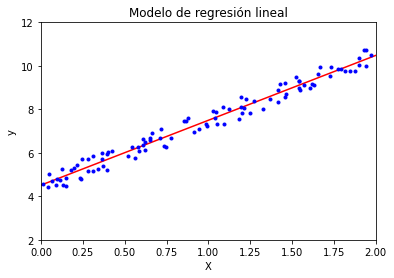

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Implementación con sklearn

Como se menciono sklearn es una libreria que tiene varios modelos y herramientas para machine learning, que resultan bastante simples de utilizar, para ello se debe importar el modelo y crear el objeto modelo, como se hace en la siguiente celda.

LinearRegression utiliza otra ecuación para resolver el mismo problema, el cual se describe en la siguiente ecuación

$$\hat{\theta} = X^+ y$$

Donde X^+ se conoce como la pseudoinversa de X o la inversa de **Moore-Penrose** que por lo general es más eficiente que utilizar la ecuación normal directamente.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Una vez creado el objeto modelo, se utiliza el metodo *fit()* para entrenar al mismo, *predict()* para realizar predicciones.

In [9]:
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

Una de las desventajas de estos modelos es que tanto la ecuación normal como la pseudoinversa de Moore-Penrose es que ambos algoritmos se vuelven bastante lentos al aumentar el numero de atributos

# Gradiente descendiente

Es un algoritmo iterativo de optimización el cual es ampliamente utilizado, este se basa en que el $\vec{\theta}$ se inicializa en valores aleatorios, estos se iran modificando gradualemente de manera que decresca progresivamente el valor de la función de costo, hasta que llegue a su minimo global o uno local, el hyperparametro relacionado con este algoritmo es $\eta$ conocido como radio de aprendizaje, el cual determina que tan rapido converge hacia dicho minimo, no obstante selecionar valores grandes de $\eta$ puede hacer que nunca converga hacia dicho minimo, por lo que debe buscarse un valor optimo para cada problema y modelo.

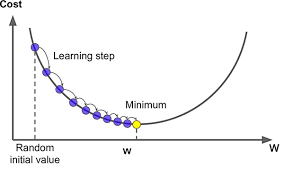

Como se menciono no todas las funciones de costo tienen solo un minimo, existe minimos locales y globales, por lo que puede que nuestro algotimo converga a alguno de ellos, en el caso de regresión lineal solo hay un minimo y es global.

<img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" />

## Gradiente descendiente batch(GDB)

Para calcular el siguiente valor del $\vec{\theta}$ es necesario tener el gradiente de la función de costo, el cual nos indica que tanto cambiaría dicha función si cambiamos los valores de $\vec{\theta}$ ligeramente

$$\frac{\partial}{\partial \theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})x^{(i)}_j $$

El vector gradiente $\nabla_{\theta} MSE(\theta)$ contiene todas las derivadas parciales de la función de costo

$$ \nabla_{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X\theta - y) $$

Para modificar el valor de $\vec{\theta}$ se utiliza la siguiente ecuación

$$ \theta^{(nuevo)} = \theta - \eta\nabla_{\theta} MSE(\theta)$$

A continuación su implementación con varios valores de $\eta$

**Nota:** Se recomienda estandarizar los atributos, ya que el algoritmo suele converger más lento si no se encuentra escalado.

0
MSE: 22.286637698288636
Valores de theta: 

[[0.87608297]
 [1.88837906]] 

400
MSE: 0.08495655256662145
Valores de theta: 

[[4.51359615]
 [2.98323551]] 

800
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 



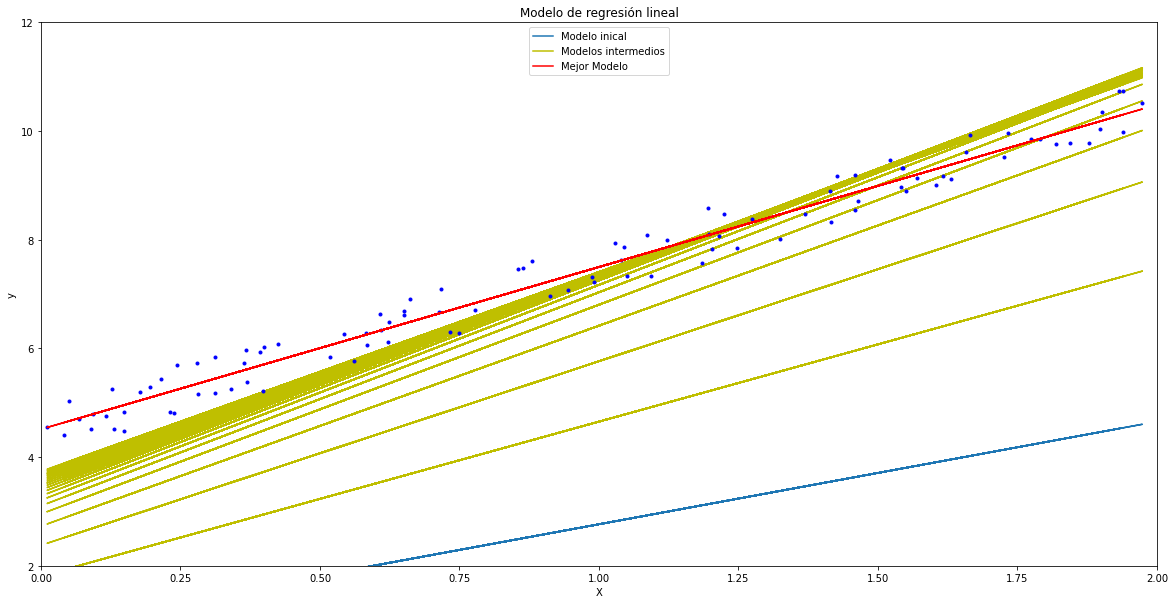

In [10]:
from sklearn.metrics import mean_squared_error

eta = 0.1 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()     


0
MSE: 3.8090466936005174
Valores de theta: 

[[4.91162784]
 [4.40627324]] 

400
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 

800
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 



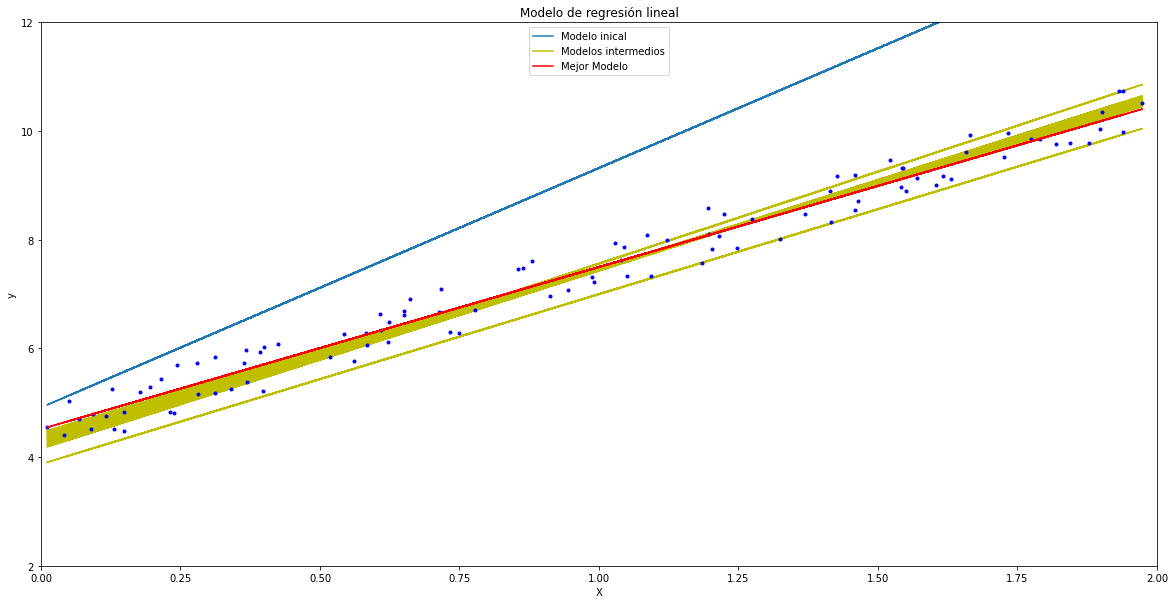

In [11]:
from sklearn.metrics import mean_squared_error

eta = 0.3 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()         


0
MSE: 31.023255396051194
Valores de theta: 

[[6.87334195]
 [6.06220075]] 

400
MSE: 2.3934044147025214e+23
Valores de theta: 

[[2.25329854e+11]
 [2.55202408e+11]] 

800
MSE: 1.85228638339644e+45
Valores de theta: 

[[1.98227890e+22]
 [2.24507467e+22]] 



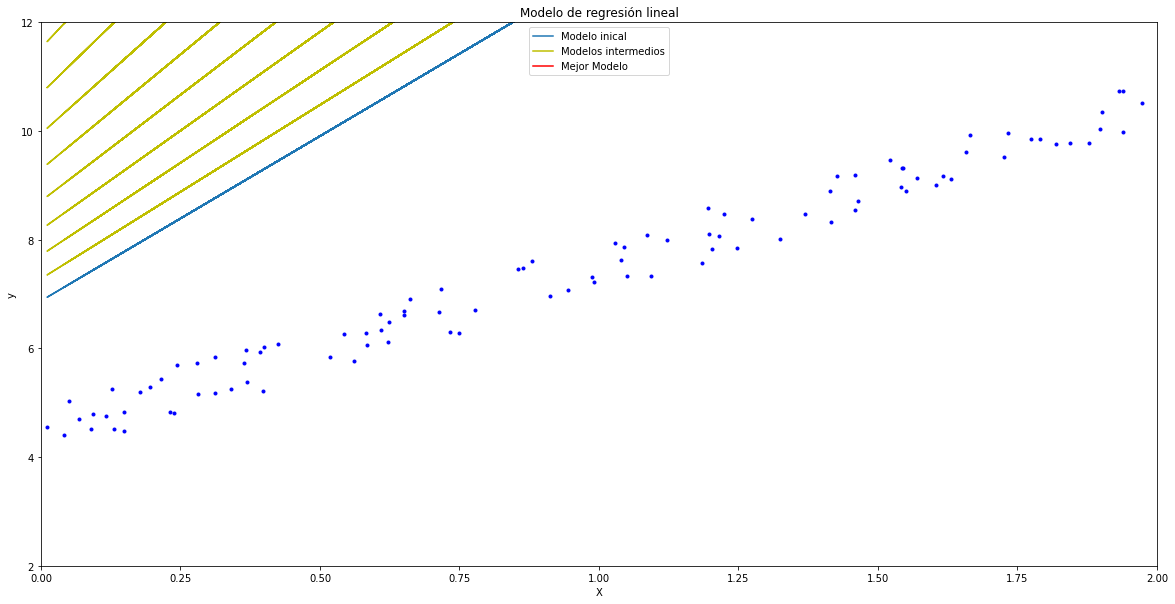

In [12]:
from sklearn.metrics import mean_squared_error

eta = 0.5 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()     

En las celdas anteriores se entrenaron 3 modelos con diferentes diferentes radios de aprendizaje, como se observo, los modelos con $\eta = 0.1 $ y $\eta = 0.3 $ convergen a un modelo que realiza buenas prediciones, sin embargo aquel con el $\eta = 0.5 $ jamas converge a la solución optima, por ello es importante seleccionar un $\eta$ apropiado

## Gradiente estocastico descendente(GSD)

El problema más grande de **GBD** es, que utiliza el dataset completo en cada iteración del entrenamiento, lo que se traduce en mayor complejidad computacional, contrario a los que hace el gradiente estocastico, este calcula el gradiente sobre una sola instancia seleccionada de manera aleatoria, lo que hace posible entrenar algoritmos en datasets de mayor tamaño de manera sustancialmente más rápido que con batch, una de las gran diferencias entre estos dos alogirtmos **GDB** suele ir directamente hacia el minimo de la función, caso contrario con **GSD** que brinca de una manera más aleatoria hacia el minimo, además de que jamás llega como tal al mismo, por tanto con **GSD** se llegará a un algoritmo optimo, pero no el mejor

<img src="https://www.researchgate.net/publication/328106221/figure/fig3/AS:678422925807621@1538760038610/Stochastic-gradient-descent-compared-with-gradient-descent.png" />

Otra ventaja de **GSD** es, que si la función de costo es irregular, es decir, no cuenta solo con un minimo, **GSD** puede escapar de dichos minimos, además de que tiene mayor probabilidad de encontrar el minimo global, dicha aleatoridad es buena para escapar de los minimos locales, sin embargo es mala en el aspecto de que nunca se mantendrá en un minimo, por convencion se realizan rondas de m iteraciones, a cada ronda se le conoce como **epoch**

Una solución es reducir gradualmente la tasa de aprendizaje, esto se demuestra en la siguiente implementación

In [13]:
eta = 0.1
n_epochs = 50
t0,t1 = 5,50

theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0/(t+t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta*gradients


Como se observa no se obtuvo la misma solución que el **GBD**, sin embargo la carga computacional es minima.

In [14]:
theta

array([[4.44653396],
       [3.15185443]])

En **sklearn** se puede implementar algoritmos de este estilo con bastante facilidad, así como se muestra a continuación, como se observa se indica el numero de iteraciones y una toleracia la cual indica al algoritmo cuando debe parar, ademas eta0 es la tasa de aprendizaje

In [15]:
from sklearn.linear_model import SGDRegressor
sdg_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sdg_reg.fit(X,y)

C:\Users\anton\ML_PATH\my_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sdg_reg.intercept_,sdg_reg.coef_

(array([4.47998525]), array([2.97671934]))

## Gradiente Mini-batch descesdiente

Es la otra tecnica de optimización que es bastante similar a **GSD** ya que la diferencia entre estos es que no solo toma una instancia para realizar al calculo del gradiente, sino que toma un grupo pequeño de instancias, su ventaja es que se comporta menos érratico.

# Regresión polinomica

Este tipo de regresión se utiliza cuando la relación de nuestros datos es no lineal, para demostrar esto se puede usar varios tipos de coeficientes o utilizar una grafica, que muestre la figura o tendencia de los datos a continuación se muestra dicha grafica

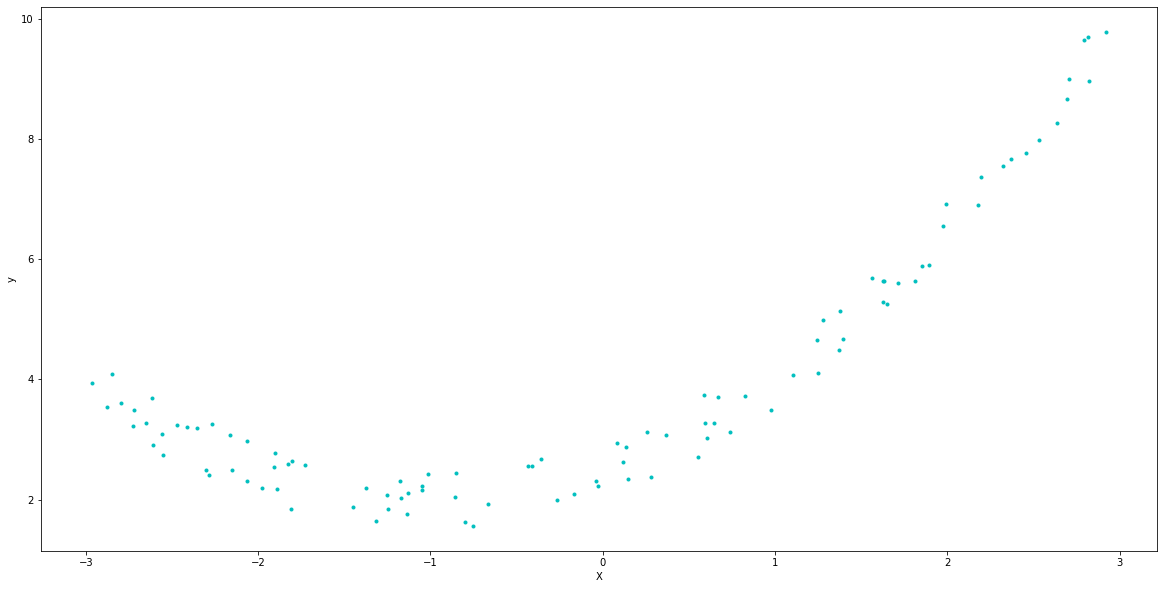

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)
plt.figure(figsize=(20,10))
plt.plot(X,y,"c.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Como se observa no es lineal, además de que en la celda anterior se genero los datos mediante una función polinomica de segundo grado, para realizar un modelo no lineal se debe utilizar *PolynomialFeatures* que ya viene implementado en **sklearn**, que lo unico que hace es agregar al vector de atributos el cuadrado de cada atributo y en caso de haber más de 1 atributo, agrega las combinaciones de los productos de estos, imagine que tiene un matriz de atributos Z

$$ Z = \; 
\begin{bmatrix}
      x_0 & y_0 \\
      x_1 & y_1
\end{bmatrix} 
$$

Se aplica polynomial features con grado de polinomio 2 y se obtiene:

$$ Z = \; 
\begin{bmatrix}
      x_0 & x_0^2 & y_0 & y_0^2 & x_0 y_0 \\
      x_1 & x_1^2 & y_1 & y_0^2 & x_1 y_1
\end{bmatrix} 
$$

El numero de atributos totales esta dado por la siguiente formula:

$$ \frac{(n+d)!}{n!d!} $$

- $n$ es el número de atributos
- $d$ el grado de polinomio

Si tomamos en cuenta la matriz Z que inicialmente tiene 2 atributos y se transformo a polinomio grado 2, se obtiene:

$$ \frac{(2+2)!}{2!2!} = 6 $$

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

Una vez que se ha transformado nuestra matriz, se procede a alimentar el objeto LinealRegression, con nuestra nueva matriz transformada.

In [19]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)
pol_reg.intercept_,pol_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

Como se observa se obtuvieron 3 coeficientes, el termino $\theta_0$ siendo el intercepto, $\theta_1$ y $\theta_2$ en orden sucesivo, y si se observa detenidamente estos coinciden con aquellos que generaron el conjunto de datos, a continuación se realizan predicciones con este modelo, para ello primero se debe transformar los datos de igual manera que el entrenamiento

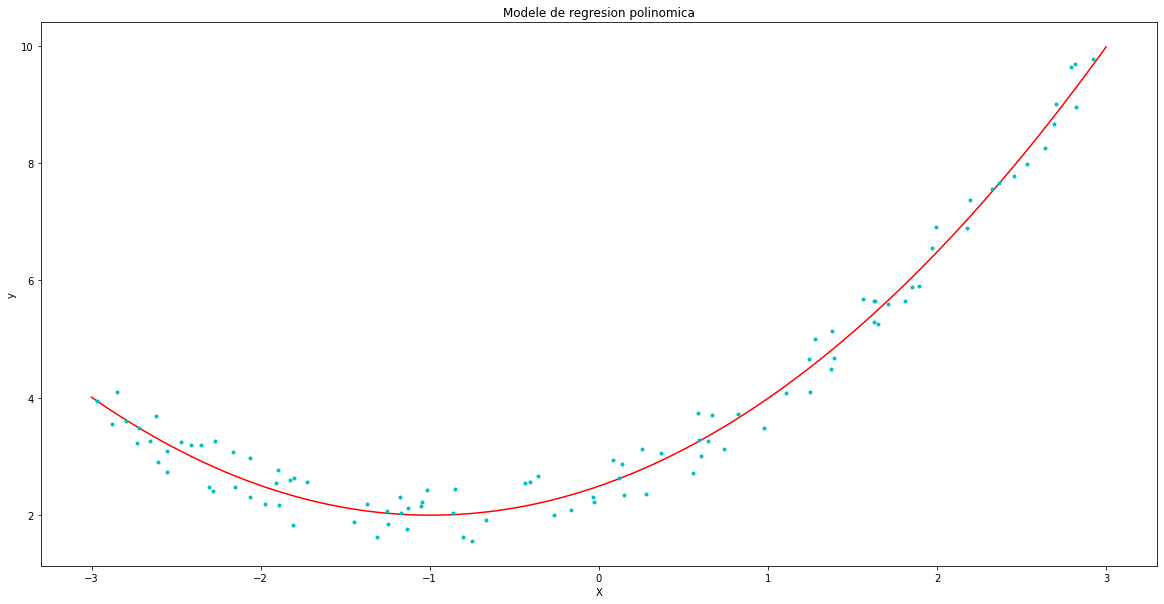

In [20]:
x_p = np.linspace(-3,3,100)
x_p = x_p.reshape(len(x_p),1)
x_p_trans = poly_features.transform(x_p)

y_p_predicts = pol_reg.predict(x_p_trans)

plt.figure(figsize=(20,10))
plt.plot(x_p,y_p_predicts,"r-")
plt.plot(X,y,"c.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Modele de regresion polinomica")
plt.show()  

# Curvas de aprendizaje

Estas curvas nos ayudan a demostras si nuestro modelo esta sobrepresentando(overfitting), no pudiendo representar los datos(underfitting) o es una bueno modelo, como se observa en la grafica anterior el modelo polinomial de segundo grado es adecuado para representar los datos y esto es obvio ademas puesto que fueron generados con una función del mismo grado.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_pred))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="Train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="Val")
    plt.ylim(0,3)

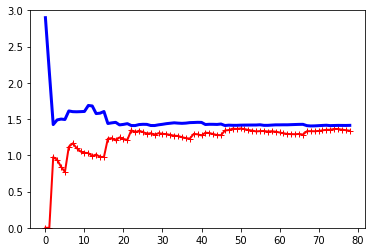

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

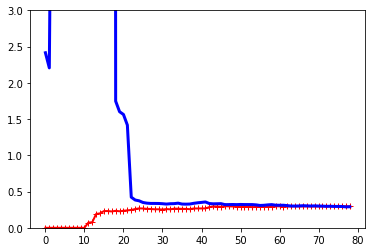

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])


plot_learning_curves(polynomial_regression,X,y)

# Softmax regression
Primero se entrenara en un dataset pequeño de 4 instancias para ilustrar su funcionamiento, e imaginaremos que tenemos 3 clases, de momento nos brincaremos el paso de dividir nuestro dataset ya que es muy pequeño y también el hot-encoder, el primer paso es calcular el puntaje de cada clase, como se observa este primer paso es exactamente el mismo que que en regresión lineal, es realizar el producto de matrices de atributos($X$) por la matriz $\Theta$ de pesos, donde cada clase tiene su propio $\vec{\theta^k}$

$$ s_{k}(x) = X\Theta $$

Por tanto $\Theta$ se ve de la siguiente manera, donde los valores inician de manera aleatoria, estos no serán aleatorios de primera instancia, para este expermiento

$$ \Theta = \; 
\begin{bmatrix}
      \theta_0^{(0)} & \theta_0^{(1)} & \theta_0^{(2)} \\
      \theta_1^{(0)} & \theta_1^{(1)} & \theta_1^{(2)} \\
      \theta_2^{(0)} & \theta_2^{(1)} & \theta_2^{(2)}
\end{bmatrix} 
$$

- $X_d$ es la matriz de atributos
- $y$ la matriz de resultados esperados
esto con respecto a la siguiente celda

In [160]:
X_d = np.array([[0.1,0.5],[1.1,2.3],[-1.1,-2.3],[-1.5,-2.5]])
X_d = np.c_[np.ones((4,1)),X_d]
Theta = np.array([[0.01,0.1,0.1],[0.1,0.2,0.3],[0.1,0.2,0.3]])


y = np.array([[0],[1],[2],[2]])

Una vez que se obtuvo la matriz $s_{k}(x)$ se procede a calcular las probabilidades, con la función softmax, definida de la siguiente manera

$$  \hat{p_k} = \frac{exp(s_{k}(x))}{\sum^{k}_{j=1} exp(s_{j}(x))} $$

In [162]:
s_k = X_d.dot(Theta)
#s_k_2 = Theta.T.dot(X_d.T).T
s_k

array([[ 0.07,  0.22,  0.28],
       [ 0.35,  0.78,  1.12],
       [-0.33, -0.58, -0.92],
       [-0.39, -0.7 , -1.1 ]])

Calculemos las probabilidades aplicando la función aqui se demostrara para un para el primer renglón, además del como realiza la predicción este modelo


$$\hat{p_0} = \frac{exp(0.07)}{exp(0.07)+exp(0.22)+exp(0.28)} = 0.2945063692$$

$$\hat{p_1} = \frac{exp(0.22)}{exp(0.07)+exp(0.22)+exp(0.28)} = 0.3421675845 $$

$$\hat{p_2} = \frac{exp(0.28)}{exp(0.07)+exp(0.22)+exp(0.28)} = 0.3633260463 $$

Ahora se aplicará a toda la matriz

In [26]:
def softmax(s_k):
    exps = np.exp(s_k)
    exps_sum = np.sum(exps,axis=1,keepdims=True)
    return exps/exps_sum

Para selecionar la predicción $\hat{y}$ se selecciona la clase con mayor probabilidad, en el caso mencionado arriba este sería clasificado como clase la 3ra clase ya que la probabilidad $\hat{p_2}$ es la mayor, sin embargo esto es erroneo, ya que al inicio se definio que este pertenece a la clase 0, a continuación se muestran las predicciones de las otras instancias, que de igual manera son incorrectas

In [27]:
probablidades = softmax(s_k)
np.argmax(probablidades,axis=1)

array([2, 2, 0, 0], dtype=int64)

Antes de empezar a entrenar nuestro algoritmo debemos crear nuestra matriz de resultados esperados, esta debe tener la siguiente forma, 0s en las clases a las que no pertenece y 1 en la que pertence, así que el $\vec{y}$ debe tomar esta nueva forma

$$ y^{(i)}_k = \; 
\begin{bmatrix}
      1 & 0 & 0 \\
      0 & 1 & 0 \\
      0 & 0 & 1 \\
      0 & 0 & 1 
\end{bmatrix} 
$$

donde originalmente tenía esta forma

$$ y = \; 
\begin{bmatrix}
0 \\ 1 \\ 2 \\ 2 
\end{bmatrix} 
$$

Para ello podemos utilizar una herramienta que ya se encuentra implementada en **sklearn** y su nombre es hot-encoder, el cual realiza dicha transformación para nosotros

In [42]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_k = encoder.fit_transform(y)
y_k

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

Para mejorar su capacidad de predicción se procederá a implementar su entrenamiento, para ello ocupamos su función de costo, siendo esta **Cross entropy** y su respectivo gradiente

$$j(\Theta) = -\frac{1}{m} \sum_{k=1}^{K}y_{k}^{(i)}log(\hat{p}^{(i)}_{0})   $$

$$\nabla j(\Theta) = \frac{1}{m} \sum_{k=1}^{K} (\hat{p}^{(i)}_{k} - y^{(i)}_k) x^{(i)}   $$

Iniciemos con una implementación sensilla con gradiente batch descendiente

In [29]:
eta = 0.2 #learning rate
n_iteration = 1000
epsilon = 1e-7
alpha = 0.1

Theta = np.array([[0.01,0.1,0.1],[0.1,0.2,0.3],[0.1,0.2,0.3]])

for iteration in range(n_iteration):
    s_k = X_d.dot(Theta)
    probs = softmax(s_k)
    
    if iteration % 200 == 0:
        cross_entropy = -1/len(X_d)*(np.sum(y_k*np.log(probs+epsilon)))
        print(cross_entropy)
        print("\n")
    
    
    
    gradient = 1/m*X_d.T.dot(probs-y_k) 
    Theta = Theta - eta * gradient
    
    
Theta

1.3215974919501436


0.41413404975302054


0.33657118391469987


0.2922312585058528


0.2588836401072254




array([[ 0.50103303, -0.29639853,  0.00536551],
       [ 0.12982673,  0.78660343, -0.31643016],
       [ 0.42830315,  1.17109779, -0.99940094]])

Una vez entrenado nuestro modelo podemos volver a realizar predicciones, esto con el fin de demostrar que ha sido entrenado, como se observa ahora si clasifica correctamente las clases

In [30]:
probablidades = softmax(s_k)
np.argmax(probablidades,axis=1),y

(array([0, 1, 2, 2], dtype=int64),
 array([[0],
        [1],
        [2],
        [2]]))

Bien una vez que ya entendemos como implementarlo a minima escala, podemos usar un dataset, para comprobar que nuestro modelo es util, para ello se utilizará el dataset **iris flowers** este dataset puede ser importado mediante **sklearn**

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Para obtener el tamaño de la matriz $\Theta$ necesitamos saber la cantidad de clases en este caso 3 clases, ya que hay 3 tipos de flores iris(virginica,setosa y versicolor) además de saber el numero de atributos en este caso se selecciono el largo y ancho de los petalos es decir 2, sin embargo se debe agregar el termino constante por tanto 3, entonces nuestra matriz es de 3x3, y se necesita crear el vector $y^{(i)}_k$

In [54]:
X = iris["data"][:,(2,3)]
y = iris["target"]
clases = len(y_k[0,:])
n_features = len(X_u[0,:])

Una vez hecho todo lo anterior se procede a realizar la división del del dataset, para ello se utiliza la función train_split de **sklearn**

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

len(X_train),len(X_test),len(X_val)

(96, 30, 24)

En esta celda se aplican las transformaciones necesarias para que los datos puedan operar correctamente en esta implementación, por ejemplo a $X$ se le agrega una columna de 1s y $y$ se transformar en la matriz de clases $\vec{y}$

In [57]:
X_train_u = np.c_[np.ones((len(X_train),1)),X_train]
X_val_u = np.c_[np.ones((len(X_val),1)),X_val]
X_test_u = np.c_[np.ones((len(X_test),1)),X_test]

y_train_k = encoder.transform(y_train)
y_test_k = encoder.transform(y_test)
y_val_k = encoder.transform(y_val)

# Implementación

Para ello debemos definir algunos parametros estos son creados en la primer sección **(#1)** de la celda, posteriormente **(#2)** se crea una variable que se utilizará para implementar la funcionalidad de early stopping y se crea la matriz de pesos $\Theta$ en la tercer sección **(#3)** inicia el el proceso de entrenamiento, para ello se realiza el cálculo de las probabilidades y mediante el gradiente de la función de costo se determina el nuevo valor de $\Theta$, una vez hecho esto **(#4)** se procede a realizar predicciones en el set de validación, esto con el fin de implementar la función de **early stopping** de manera que el entrenamiento termine antes de que el modelo empiece a sobreajustarse(overfitting) a los datos de entranmiento, de manera que pueda generalizar de mejor forma, esto se realiza calculando el error sobre las preddiciones hechas sobre los datos de validación calculando el error del modelo sobre ellos, además se agregó regularización Rigde a la función de costo y al cálculo del gradiente, finalemente **(#5)** se determina si el error del de validación vuelve a crecer, esto se realiza en el segundo condicional de dicha sección, este parará automáticamente si el error empieza a crecer, ya que significaría que está empezando a haber un ligero sobreajuste y por tanto se detendría el entrenamiento

In [130]:
#1 
eta = 0.1 #learning rate
n_iteration = 10000
epsilon = 1e-7
alpha = 0.1
m = len(X_train)

#2
best_error = float("inf")
Theta = np.random.random((clases,n_features))


#3
for iteration in range(n_iteration):
    
    s_k = X_train_u.dot(Theta)
    probs = softmax(s_k)
    gradient = 1/m*X_train_u.T.dot(probs-y_train_k) + np.r_[np.zeros([1, 3]), alpha * Theta[1:]]
    Theta = Theta - eta * gradient 

    #4
    s_k_val = X_val_u.dot(Theta)
    probs_val = softmax(s_k_val)
    cross_entropy = -np.mean(np.sum(y_val_k * np.log(probs_val + epsilon),axis=1)) 
    l2_regularization = 1/2 * np.sum(np.square(Theta[1:]))
    val_error = cross_entropy + alpha*l2_regularization    
    
    #5
    if iteration % 500 == 0:
        print(iteration, val_error)
    if val_error < best_error:
        best_error = val_error
    else:
        print(iteration - 1, best_error)
        print(iteration, val_error, "early stopping!")
        break
Theta

0 1.5496960487481917
500 0.5551642164417261
1000 0.5288046743227075
1500 0.5224698029563778
2000 0.5207916173257219
2500 0.5204968273710581
2511 0.520496745589224
2512 0.5204967465948884 early stopping!


array([[ 4.69625759,  1.0335971 , -4.0860241 ],
       [-1.08254628,  0.15197679,  0.93056949],
       [-0.42964218, -0.19251909,  0.62216127]])

# Resultados

Para ver si nuestro modelo está realizando su trabajo podemos utilizar alguna función que nos permita medir el error al momento de realizar predicciones, una de ellas es la confussion matrix, la cual en nos indica la clase actual del dato y la predicción, así como se muestra en la siguiente imagen, los mejores modelos tendrán la diagonal principal de la matriz con valores altos y pocos valores a la periféria, o tambien utilizar las medidas de presición y recall

<img src="https://miro.medium.com/max/1400/1*TOVAm14q2GsAnx8q79nQlQ.png" />

In [150]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
Preds_en_X_train = np.argmax(X_train_u.dot(Theta),axis=1)

print(f"Precisión: {precision_score(Preds_en_X_train,y_train,average='micro')}")

print(f"Recall: {recall_score(Preds_en_X_train,y_train,average='micro')}")

print(confusion_matrix(Preds_en_X_train,y_train))

Precisión: 0.9791666666666666
Recall: 0.9791666666666666
[[30  0  0]
 [ 0 33  1]
 [ 0  1 31]]


In [151]:
Preds_en_X_val = np.argmax(X_val_u.dot(Theta),axis=1)


print(f"Precisión: {recall_score(Preds_en_X_val,y_val,average='micro')}")

print(f"Recall: {precision_score(Preds_en_X_val,y_val,average='micro')}")

print(confusion_matrix(Preds_en_X_val,y_val))

Precisión: 1.0
Recall: 1.0
[[8 0 0]
 [0 8 0]
 [0 0 8]]


# Modelo final

Podemos utilizar los datos prueba y ver su desempeño en instancias que jamás ha visto, estos datos no deben ser tocados para nada, solo cuando consideramos que el modelo está listo, como se observa tiene un desempeño regular, si bien no es perfecto, un 90% de estos valores es bastante bueno.

In [152]:
Preds_en_X_test = np.argmax(X_test_u.dot(Theta),axis=1)

print(f"Precisión: {precision_score(Preds_en_X_test,y_test,average='micro')}")

print(f"Recall: {recall_score(Preds_en_X_test,y_test,average='micro')}")

print(confusion_matrix(Preds_en_X_test,y_test))



Precisión: 0.9
Recall: 0.9
[[12  0  0]
 [ 0  6  1]
 [ 0  2  9]]
